# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from tqdm import tqdm


import matplotlib.pyplot as plt
# import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 2 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print(u"Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [11]:
## Задание 1  #Slow algorithm
from sklearn.base import BaseEstimator, ClusterMixin
from collections import Counter
class DBSCAN_slow(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    def dist_eucld(self, x,y):
        return np.linalg.norm(x-y)

    def RangeQuery(self, x, Q_ind):
        Neighbors = []
        Q = x[Q_ind,:]
        for ind, point in enumerate(x):
            if self.dist(Q, point)<self.eps:
                Neighbors.append(ind)
        return Neighbors       
    
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps     = kwargs['eps']     if 'eps'     in kwargs else 0.8
        self.min_pts = kwargs['min_pts'] if 'min_pts' in kwargs else 5
        if kwargs['dist']== "euclidian" : self.dist = lambda x,y : self.dist_eucld(x,y)
        else: 
            sys.stderr.write('Chose distanse dist = "euclidian"/...')
        self.label = None
        return
        
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        C = -1
        label = {}
        for ind, point in enumerate(x):
            if ind in label: continue                                      #Previously processed in inner loop
            Neighbors = self.RangeQuery(x, ind)                            #Find neighbors
            if len(Neighbors) < self.min_pts:                              #Density check
                label[ind] = -1                                            #Label as Noise
                continue
            C = C+1                                                        #next cluster label
            S = Neighbors.copy()                                           #Neighbors to expand
            c = -1
            while(c<len(S)-1):                                             #Process every seed point
                c+=1                                                        
                Q = S[c]
                if Q in label:                                             #Change Noise to border point
                    if label[Q] == -1: 
                        label[Q] = C
                        continue
#                     else: print("FUCK")
                label[Q] = C                                               #Label neighbor 
                Neighbors = self.RangeQuery(x, Q)                          #Find neighbors
                if len(Neighbors) >= self.min_pts:                         #Density check
                    S.extend(list(set(Neighbors) - set(S)))                #Add new neighbors to seed set
        self.label = label
        return self
    
    
    def predict(self, x, show_outliers = False):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        if self.label == None:
            sys.stderr.write("Firstly fit the model please")
            return None
        if show_outliers:
            return list(self.label.values())
        else:
            label = self.label
            for ind, none in filter(lambda x:x[1]==-1, self.label.items()):
                srt = Counter([self.label[i] for i in self.RangeQuery(x, ind)])
                label[ind] = srt[0] if srt[0] != -1 or len(srt)<=1 else srt[1]
        return list(label.values())
    
    

    
    def fit_predict(self, x, y=None, show_outliers = False):
        self.fit(x, y)
        return self.predict(x, show_outliers = show_outliers)

y_predict = DBSCAN_slow(eps = 0.5, min_pts = 5, dist = "euclidian").fit_predict(x_iris, show_outliers = True)
print('iris results\t'+str(Counter(y_predict)))

iris results	Counter({0: 49, 1: 44, -1: 7})


In [72]:
## Задание 1  #Slow algorithm
from sklearn.base import BaseEstimator, ClusterMixin
from collections import Counter
from scipy.spatial import distance_matrix


class DBSCAN(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """   
    
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps     = kwargs['eps']     if 'eps'     in kwargs else 0.8
        self.min_pts = kwargs['min_pts'] if 'min_pts' in kwargs else 5
        self.label = None
        return
        
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        DIST = distance_matrix(x,x) #
        self.DIST = DIST
        
        self.x_len = len(x)
        C = 0
        y = np.zeros(self.x_len )-1
        for ind in range(self.x_len):
            if y[ind] != -1:
                continue                                                   #Previously processed in inner loop
            Neighbors = np.where(DIST[ind,:]<self.eps)[0]                  #Find neighbors
            if len(Neighbors) < self.min_pts:                              #Density check
                y[ind] = 0                                                 #Label as Noise
                continue
            C = C+1                                                        #next cluster label
            y[ind] = C
            
            S = list(np.delete(Neighbors, np.argwhere(Neighbors == ind)))  #Neighbors to expand
            c = -1
            while(c<len(S)-1):                                             #Process every seed point
                c += 1                                                        
                ind2 = S[c]
                if y[ind2] == 0  : y[ind2] != C                            #Change Noise to border point
                if y[ind2] != -1 : continue
                    
                y[ind2] = C                                                #Label neighbor 
                Neighbors = np.where(DIST[ind2,:]<self.eps)[0]             #Find neighbors
                if len(Neighbors) >= self.min_pts:                         #Density check
                    S.extend(list(set(Neighbors) - set(S)))                #Add new neighbors to seed set
        self.label = y
        return self
    
    
    def predict(self, x, show_outliers = True):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        if show_outliers:
            return self.label-1
        else:
            label = self.label
            for ind in np.where(self.label == 0)[0]:
                srt = self.DIST[ind, :]
                q = ind
                while(label[q] == 0):
                    q = np.argmin(srt)
                    srt[q] = 1e4
                label[ind] = label[q]
            return label-1
    
    def fit_predict(self, x, y=None, show_outliers = True):
        self.fit(x, y)
        return self.predict(x, show_outliers = show_outliers)
    
y_predict = DBSCAN(eps = 0.5, min_pts = 5).fit_predict(x_iris, show_outliers = True)
print("iris test (with outliers)\t"+str(Counter(y_predict)))

y_predict = DBSCAN(eps = 0.5, min_pts = 5).fit_predict(x_iris, show_outliers = False)
print("iris test\t\t\t"+str(Counter(y_predict)))

iris test (with outliers)	Counter({0.0: 49, 1.0: 44, -1.0: 7})
iris test			Counter({0.0: 50, 1.0: 50})


In [ ]:
mod = DBSCAN_fast(eps = 0.5, min_pts = 5, dist = "euclidian")
mod.fit(x_iris)
y_predict = mod.predict(x_iris, show_outliers=False)
# mod.RangeQuery(x_iris, 2)
from sklearn.metrics import accuracy_score
temp1 = accuracy_score(y_predict, y_iris)
temp0 = accuracy_score([int(i==0) for i in y_predict], y_iris)
print("Accurancy results: "+str(max(temp0,temp1)))

## Measure time

In [910]:
x_iris.shape

(100, 4)

In [945]:
# X = np.random.normal(10,0,10,10)
def get_data(x1,x2, shape):
        n = int(shape[0]/2)
        X = np.zeros((n*2, shape[1]))
        for i in range(shape[1]):
            X[:,i] = np.concatenate((
                np.random.normal(x1[i][0],x1[i][1], n),
                np.random.normal(x2[i][0],x2[i][1], n)
            ))
        return X
X = get_data([[3,1]]*4,[[-1,1]]*4, (1000,4))

In [977]:
from tqdm import tqdm
m1,m2,m3 = [],[],[]
t = []
k = 4
for i in tqdm(np.arange(10, 10000, 1000)):
    t.append(i)
    X = get_data([[1,0.4]]*k, [[-1,0.4]]*k,(i,k))
#     tmp = %timeit -r 1 -o -q DBSCAN_slow(eps = 0.5, min_pts = 5, dist = "euclidian").fit_predict(X)
#     m1.append(tmp)

    tmp = %timeit -r 1 -o -q DBSCAN(eps = 0.5, min_pts = 5).fit_predict(X, show_outliers = True)
    m2.append(tmp)

    from sklearn.cluster import DBSCAN as DBSCAN_sklearn
    tmp = %timeit -r 1 -o -q DBSCAN_sklearn(eps = 0.5, min_samples = 5).fit_predict(X)
    m3.append(tmp)


100%|██████████| 10/10 [02:10<00:00, 22.14s/it]


In [1102]:
from sklearn.cluster import DBSCAN as DBSCAN_sklearn
from tqdm import tqdm
results = {
    "DBSCAN (use scipy.spatial.distance_matrix (KDtree))":[],
    "DBSCAN sklearn":[],
    'size':[]
}
t = []
k = 4
for i in tqdm(np.arange(100,50000,1000)):
    X = get_data([[-10,10]]*k, [[10,2]]*k,(i,k))
    
    tmp = %timeit -r 1 -o -q DBSCAN(eps = 0.5, min_pts = 5).fit_predict(X, show_outliers = True)
    results["DBSCAN (use scipy.spatial.distance_matrix (KDtree))"].append(tmp)


    tmp = %timeit -r 1 -o -q DBSCAN_sklearn(eps = 0.5, min_samples = 5, algorithm="kd_tree").fit_predict(X)
    results["DBSCAN sklearn"].append(tmp)
    results['size'].append(i)


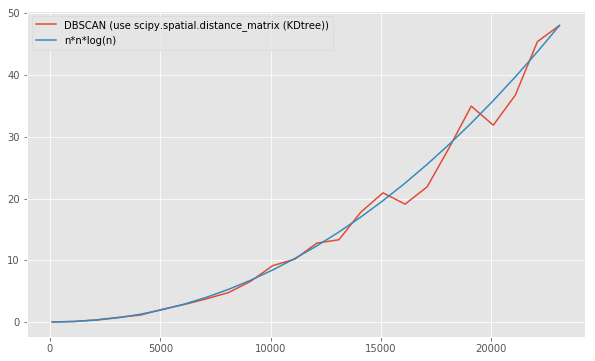

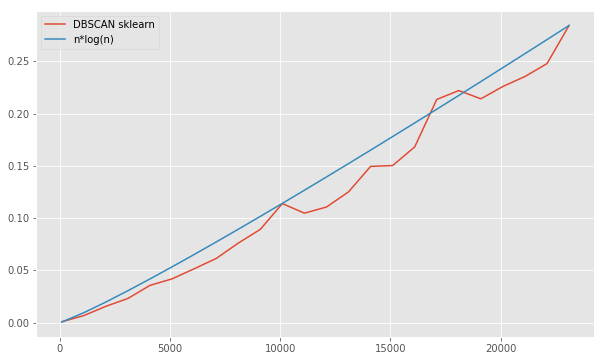

In [1103]:
def assymtotic(name):
    t = results['size']
    lst = [k.average for k in results[name]]
    if name == "DBSCAN (use scipy.spatial.distance_matrix (KDtree))":
        i = t[-1]
        Norm = lst[-1]/(i*i*math.log(i))
        return [Norm*i*i*math.log(i) for i in t]
    elif name == "DBSCAN sklearn":
        i = t[-1]
        Norm = lst[-1]/(i*math.log(i))
        return [Norm*i*math.log(i) for i in t]

    return None
    
plt.figure(figsize=(10,6))
for name in ["DBSCAN (use scipy.spatial.distance_matrix (KDtree))"]:#, "DBSCAN sklearn"]:
    lst = results[name]
    t   = results['size']
    plt.plot(t, [i.average for i in lst], label = name)
    tmp = assymtotic(name)
    if tmp != None:
        plt.plot(t, tmp, label = "n*n*log(n)")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for name in ["DBSCAN sklearn"]:
    lst = results[name]
    t   = results['size']
    plt.plot(t, [i.average for i in lst], label = name)
    tmp = assymtotic(name)
#     print(len(tmp))
#     print(len(t))
    if tmp != None:
        plt.plot(t, tmp, label = "n*log(n)")
plt.legend()
plt.show()

In [25]:
print("DBSCAN Hand make distanse")
%timeit -r 1 mod = DBSCAN_slow(eps = 0.01, min_pts = 5, dist = "euclidian").fit_predict(x_iris)

print("DBSCAN scipy.spatial.distance_matrix ")
%timeit -r 1 mod = DBSCAN(x = x_iris, eps=0.8, min_pts = 4)

from sklearn.cluster import DBSCAN as DBSCAN_sklearn
print("DBSCAN sklearn")
%timeit -r 1 mod = DBSCAN_sklearn(eps = 0.01, min_samples = 5).fit_predict(x_iris)


DBSCAN Hand make distanse
139 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
DBSCAN scipy.spatial.distance_matrix 
1.34 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000000 loops each)
DBSCAN sklearn
792 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


#### Самая простая реализация алгоритма - n^3
#### Используя scipy.spatial.distance_matrix - n^2*log(n)
####  Sklearn работает за n*log(n)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

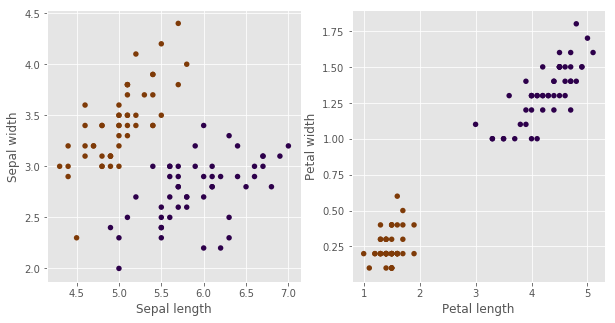

In [26]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

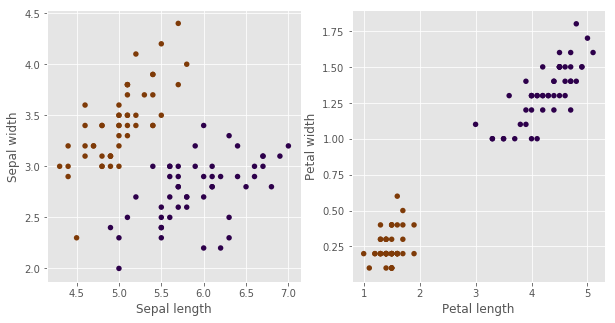

In [29]:
pl.figure(figsize=(10, 5))
pred_iris = DBSCAN(eps = 0.9, min_pts = 5, dist = "euclidian").fit_predict(x_iris)


pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [30]:
pred_iris = DBSCAN(eps = 0.9, min_pts = 5, dist = "euclidian").fit_predict(x_iris)
print("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [210]:
## Задание 2

from sklearn.metrics import silhouette_score
def quality(x, y, eps = 0.8, min_pts = 5, dtype = 0):
    """
    Implement quality criterion of your choice
    """
    def dist(x,y):
        return np.linalg.norm(x-y)
    if dtype == 0:
    # Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
        centroid = {}
        label = {c:l for c,l in enumerate(y)}
        for i in set(y):
            centroid[i] = np.array([x[i[0]] for i in filter(lambda x:x[1]==i, label.items())]).mean()
        dist = sum([(x[i[0]] - centroid[i[1]])**2 for i in label.items()])
        return dist
    if dtype == 1:
    # Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)   centroid = {}
        dist_lst = []
        label = {c:l for c,l in enumerate(y)}
        for i in set(y):
            MAXDIST = 0
            for k,none1 in filter(lambda x:x[1] == i,label.items()):
                for j, none2 in filter(lambda x:x[1] == i,label.items()):
                    curDist = dist(x[k],x[j])
                    if curDist > MAXDIST: MAXDIST = curDist
                    pass
            dist_lst.append(MAXDIST)
        return np.array(dist_lst).mean()
    #Sihouette
    if dtype == 2:
        if len(set(y)) == 1: return 666
        temp = None
        try:
            temp = silhouette_score(x, y)
        except:
            temp = 666
        return temp
print(quality(x_iris, y_iris, dtype = 0))
print(quality(x_iris, y_iris, dtype = 1))
print(quality(x_iris, y_iris, dtype = 2))

1297.3964
2.5718829762
0.736936816023


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [85]:
min_pts = range(1, 12)
eps     = np.linspace(0.01, 4, 100)

criteria1 = np.zeros((len(min_pts), len(eps)))
criteria2 = np.zeros((len(min_pts), len(eps)))
criteria3 = np.zeros((len(min_pts), len(eps)))


x = x_iris
for i0, k0 in enumerate(min_pts):
    for i, k in tqdm(enumerate(eps)):
        cls = DBSCAN(eps = k, min_pts = k0)
        y = cls.fit_predict(x)
        criteria1[i0,i] = quality(x, y, dtype = 0)
        criteria2[i0,i] = quality(x, y, dtype = 1)
        criteria3[i0,i] = quality(x, y, dtype = 2)


100it [00:08, 10.82it/s]
100it [00:06, 14.55it/s]
100it [00:07, 13.45it/s]
100it [00:07, 10.89it/s]
100it [00:07, 12.87it/s]
100it [00:06, 12.86it/s]
100it [00:07, 12.91it/s]
100it [00:06, 12.35it/s]
100it [00:06, 12.58it/s]
100it [00:06, 15.27it/s]
100it [00:06, 15.15it/s]


Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)


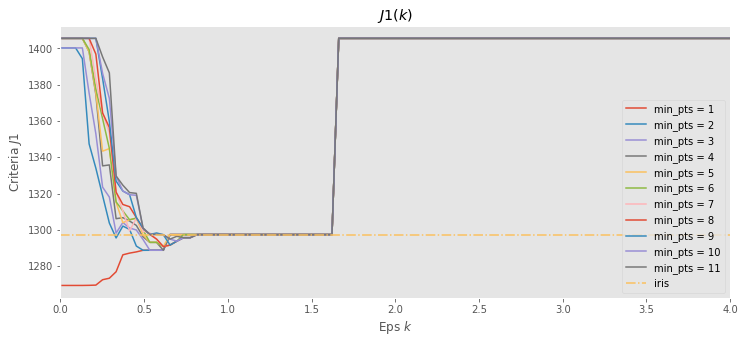

Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)


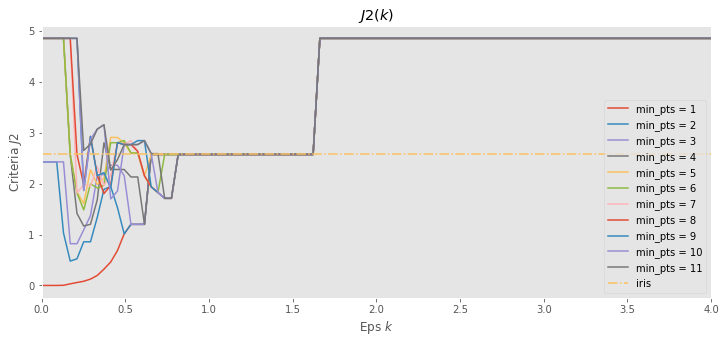

Sihouette


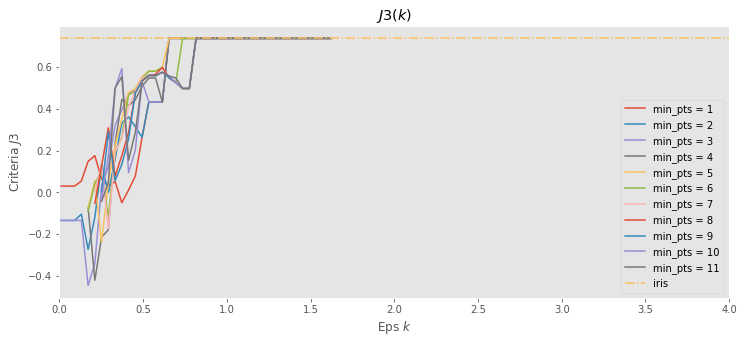

In [86]:
text = """Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
Sihouette""".split('\n')
for c1, criteria in enumerate([criteria1, criteria2, criteria3]):
    print(text[c1])
    pl.figure(figsize=(12, 5))
    pl.xlim(0,4)
    for c, cr in enumerate(criteria):
        if c1!=2:  pl.plot(eps, cr, label = "min_pts = "+str(min_pts[c]))
        else:
            ind = np.where(cr!=666)
            pl.plot(eps[ind], cr[ind], label = "min_pts = "+str(min_pts[c]))
    perfect = quality(x_iris, y_iris, dtype = c1)
    plt.plot([0,4],[perfect]*2, label = "iris", linestyle="-.")
    pl.legend()
    pl.title("$J"+str(c1+1)+"(k)$")
    pl.ylabel("Criteria $J$"+str(c1+1))
    pl.xlabel("Eps $k$")
    pl.grid()
    pl.show()

# Задание 3

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

In [87]:
## Задание 3
import pandas as pd

In [304]:
df = pd.read_csv('WDI_csv/WDIDATA.csv')

In [101]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.283193e+01,8.347462e+01,8.400608e+01,8.441615e+01,8.473457e+01,8.500364e+01,8.524497e+01,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.504225e+01,8.465534e+01,8.595535e+01,8.639231e+01,8.684697e+01,8.760496e+01,8.803912e+01,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.229232e+01,7.176534e+01,7.373427e+01,7.450072e+01,7.521850e+01,7.671225e+01,7.740727e+01,NaN,NaN,NaN
5,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.509408e+01,9.472336e+01,9.529989e+01,9.539420e+01,9.547506e+01,9.566886e+01,9.608860e+01,NaN,NaN,NaN
6,Arab World,ARB,Account (% age 15+) [ts],WP_time_10.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,Account at a financial institution (% age 15+),WP_time_01.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Account at a financial institution, female (% ...",WP_time_01.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Account at a financial institution, income, po...",WP_time_01.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
year = '2016'

In [314]:
df = df[pd.notnull(df[year])]

In [315]:
g = {}
for counry_name, lst in df.groupby('Country Code'):
    g[counry_name] = {}
    for ind, val in zip(lst['Indicator Name'], lst[year]):
        g[counry_name][ind] = val
g = pd.DataFrame.from_dict(g).T

In [316]:
g

,ARI treatment (% of children under 5 taken to a health provider),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adolescents out of school (% of lower secondary school age),"Adolescents out of school, female (% of female lower secondary school age)","Adolescents out of school, male (% of male lower secondary school age)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) newly infected with HIV,Age dependency ratio (% of working-age population),...,Wholesale price index (2010 = 100),"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.607999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,86.570932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.627356
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,21000.0,97.274212,...,NaN,65.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.712696
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,500.0,44.001540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.800597
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.057475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710946
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.608178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5500.0,5400.0,56.542246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.964997
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,500.0,44.894943,...,131.895098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.014225
ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## To many NaN

In [172]:
print("NaNs    \t"+str(sum(sum(g.isnull()))))
print("All elem\t"+str(g.shape[0]*g.shape[1]))

print("%\t"+str(sum(sum(g.isnull()))/g.shape[0]/g.shape[1]))

NaNs    	129443
All elem	220657
%	0.586625395977


### Выбросим самие редкие страны и редкие признаки

In [173]:
countries = {}
for cn, i in zip(g.index, g.get_values()):
    temp = np.isnan(i)
    countries[cn] = sum(temp)*1.0/len(temp)

In [174]:
for key, val in sorted(countries.items(), key = lambda x:-x[1]):
    print(key+'\t'+str(val))

MAF	0.986889153754
IMN	0.979737783075
MNP	0.976162097735
ASM	0.973778307509
GRL	0.973778307509
VGB	0.971394517282
SXM	0.970202622169
TCA	0.969010727056
FRO	0.965435041716
GIB	0.965435041716
BMU	0.961859356377
LIE	0.961859356377
CYM	0.960667461263
MCO	0.942789034565
AND	0.932061978546
NRU	0.912991656734
SMR	0.897497020262
CHI	0.891537544696
CUW	0.886769964243
ABW	0.880810488677
VIR	0.879618593564
GUM	0.877234803337
NCL	0.874851013111
TUV	0.874851013111
PYF	0.868891537545
PRK	0.839094159714
MHL	0.829558998808
ERI	0.820023837902
PRI	0.812872467223
CUB	0.805721096544
PLW	0.780691299166
LBY	0.766388557807
TKM	0.760429082241
SYR	0.755661501788
BHR	0.746126340882
KNA	0.740166865316
SSD	0.736591179976
FSM	0.735399284863
KIR	0.733015494636
SYC	0.731823599523
BRB	0.717520858164
PSS	0.716328963051
SOM	0.716328963051
VEN	0.709177592372
IRN	0.707985697259
OMN	0.707985697259
NAM	0.699642431466
VUT	0.69725864124
TMN	0.696066746126
MAC	0.694874851013
PNG	0.6936829559
XKX	0.688915375447
TLS	0.682955899

### Нет зависимости размера/важности страны от количества индикаторов (не красиво будет выкидывать некоторые страны)

In [175]:
features = {}
for i in g.keys():
    features[i] = sum(g[i].notnull())*1.0/len(g.keys())

In [176]:
for key, val in sorted(features.items(), key = lambda x:-x[1]):
    print(key+'\t'+str(val))

Surface area (sq. km)	0.313468414779
Land area (sq. km)	0.312276519666
Population, total	0.312276519666
Bird species, threatened	0.311084624553
Fish species, threatened	0.311084624553
Mammal species, threatened	0.311084624553
Plant species (higher), threatened	0.311084624553
Population density (people per sq. km of land area)	0.311084624553
Population growth (annual %)	0.311084624553
Rural population	0.30989272944
Rural population (% of total population)	0.30989272944
Urban population	0.30989272944
Urban population (% of total)	0.30989272944
Urban population growth (annual %)	0.30989272944
Secure Internet servers	0.300357568534
Secure Internet servers (per 1 million people)	0.300357568534
Rural population growth (annual %)	0.299165673421
Individuals using the Internet (% of population)	0.296781883194
Mobile cellular subscriptions	0.293206197855
Mobile cellular subscriptions (per 100 people)	0.293206197855
Fixed telephone subscriptions	0.292014302741
Fixed telephone subscriptions (per 1

#### Обучем DBScan на всем, получим проклятие размерности, затем обучим только на понятных автору фичах и проинтропретируем результат

#### Но перед этим отнормируем признаки

In [177]:
for i in g.keys():
    g[i] = g[i].fillna(g[i].mean())#.groupby(i).transform(lambda x: x.fillna(x.mean()))
    g[i] = (g[i] - g[i].mean())/g[i].std()

In [183]:
##Отрисуем все

#Координаты стран
CC = pd.read_csv("Country_List_ISO_3166_Codes_Latitude_Longitude.csv")
a = set(df['Country Code'].unique())
b = set(CC['Alpha-3 code'].unique())
countr_dct = {k:i for i,k in df[["Country Name","Country Code"]].get_values()}
# for i in a-b:
#     countr_dct(temp[i])
countries = CC[CC['Alpha-3 code'].isin(a & b)][['Alpha-3 code', "Latitude (average)", "Longitude (average)"]]

In [204]:
# Кластеризуем DBSCAN
g = g.fillna(0)

In [214]:
min_pts = range(1, 40)
eps     = np.linspace(0.01, 40, 40)

criteria1   = np.zeros((len(min_pts), len(eps)))
criteria2   = np.zeros((len(min_pts), len(eps)))
criteria3   = np.zeros((len(min_pts), len(eps)))
num_cluster = np.zeros((len(min_pts), len(eps)))

x = g.get_values()
for i0, k0 in enumerate(min_pts):
    for i, k in tqdm(enumerate(eps)):
        cls = DBSCAN_sklearn(eps = k, min_samples = k0)
        y = cls.fit_predict(x)
        criteria1[i0,i] = quality(x, y, dtype = 0)
        criteria2[i0,i] = quality(x, y, dtype = 1)
        criteria3[i0,i] = quality(x, y, dtype = 2)
        num_cluster[i0,i] = len(set(y))


2it [00:01,  2.41it/s]
2it [00:02,  1.30s/it]
2it [00:02,  1.19s/it]
2it [00:02,  1.42s/it]
2it [00:02,  1.30s/it]
2it [00:02,  1.27s/it]
2it [00:02,  1.16s/it]
2it [00:02,  1.22s/it]
2it [00:02,  1.18s/it]
2it [00:02,  1.22s/it]
2it [00:02,  1.33s/it]
2it [00:02,  1.20s/it]
2it [00:02,  1.28s/it]
2it [00:02,  1.20s/it]
1it [00:01,  1.50s/it]


KeyboardInterrupt: 

Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)


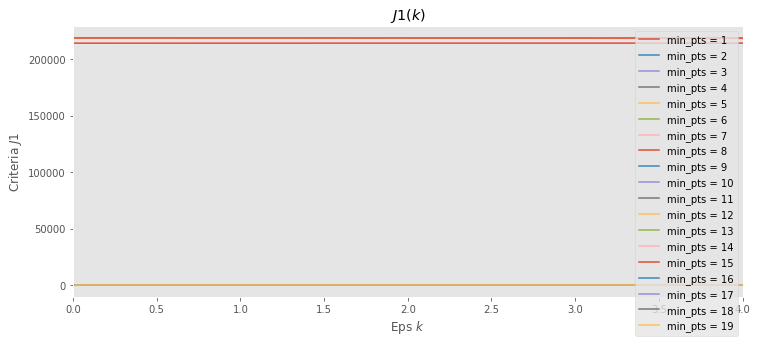

Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)


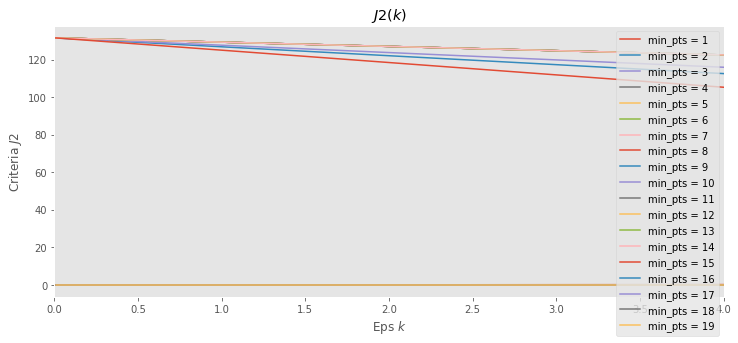

Sihouette


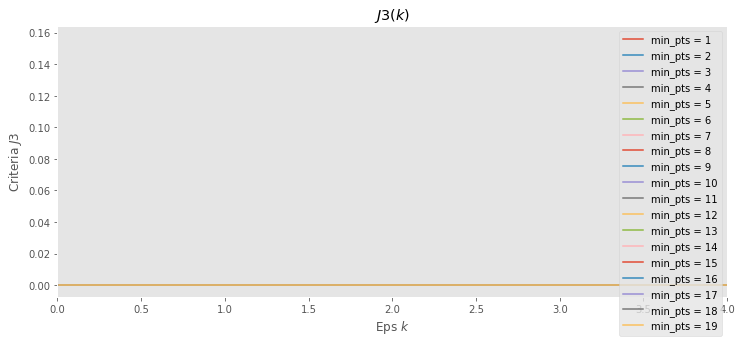

In [215]:
text = """Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
Sihouette""".split('\n')
for c1, criteria in enumerate([criteria1, criteria2, criteria3]):
    print(text[c1])
    pl.figure(figsize=(12, 5))
    pl.xlim(0,4)
    for c, cr in enumerate(criteria):
        if c1!=2:  pl.plot(eps, cr, label = "min_pts = "+str(min_pts[c]))
        else:
            ind = np.where(cr!=666)
            pl.plot(eps[ind], cr[ind], label = "min_pts = "+str(min_pts[c]))
#     plt.plot([0,4],[perfect]*2, label = "iris", linestyle="-.")
    pl.legend()
    pl.title("$J"+str(c1+1)+"(k)$")
    pl.ylabel("Criteria $J$"+str(c1+1))
    pl.xlabel("Eps $k$")
    pl.grid()
    pl.show()

In [243]:
y_pred = DBSCAN_sklearn(eps=9, min_samples=7).fit_predict(g.get_values())
print(Counter(y_pred))

Counter({-1: 240, 0: 23})


In [291]:
from sklearn.manifold import TSNE
mod = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, 
           learning_rate=100.0, n_iter=1000, metric='euclidean', init='random',
           verbose=0, random_state=None)
x_new = mod.fit_transform(g.get_values())

0.986576843262 -0.419871025085


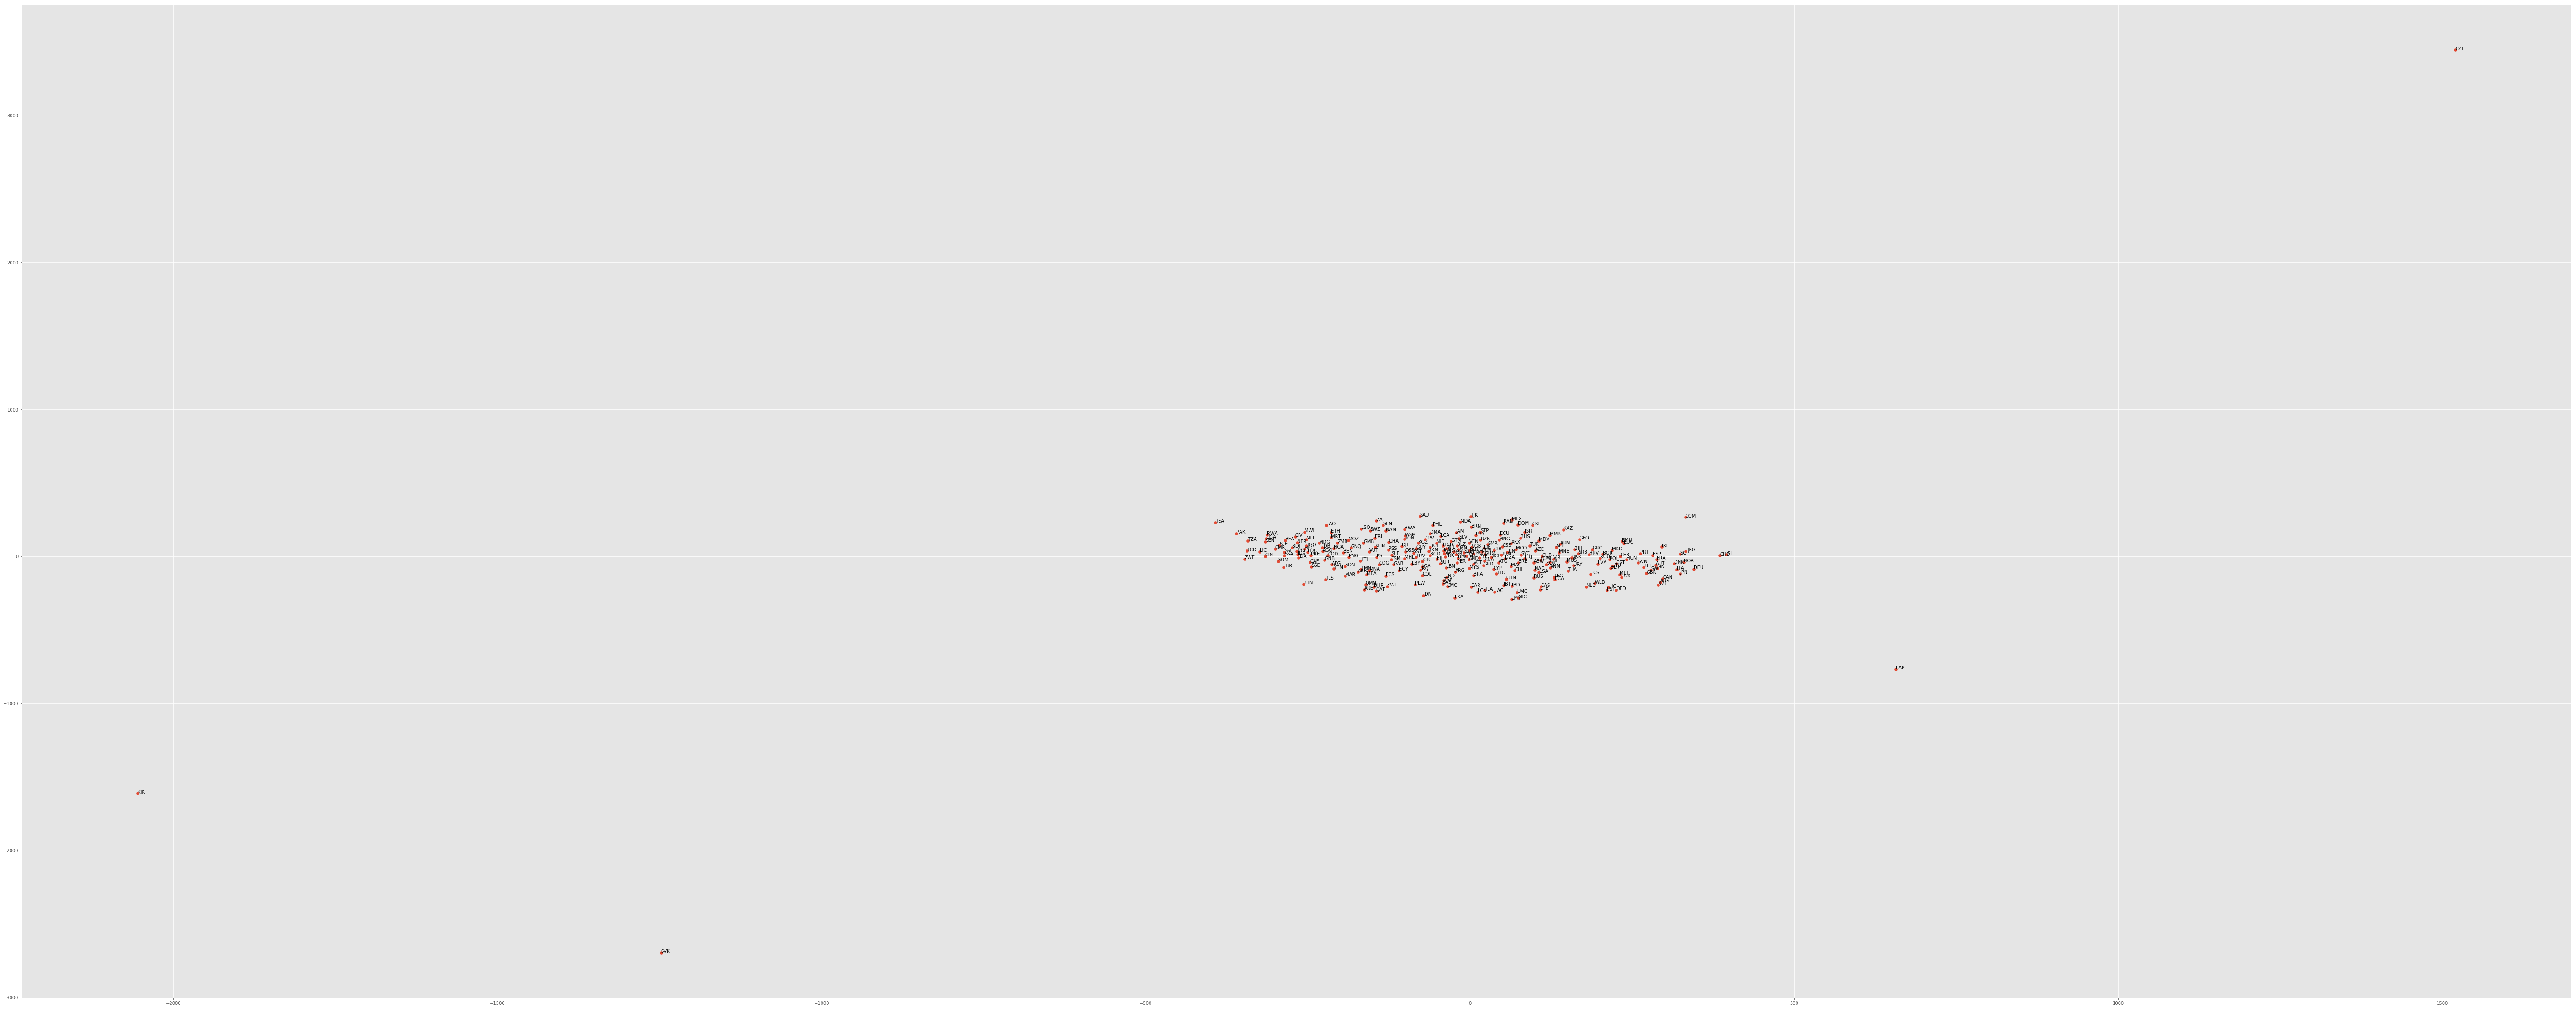

In [290]:
plt.figure(figsize = (100,40))
# plt.xlim(-500,-500)
# plt.ylim(-1000,1000)
print(x_new[0,0]/100,x_new[0,1]/100)
plt.text(x_new[0,0]/100,x_new[0,1]/100,'1')
plt.scatter(x_new[:,0],x_new[:,1])
for i,txt in zip(x_new, g.index.get_values()):
    plt.text(i[0],i[1],txt)
plt.savefig("countries.png")
plt.show()

### Кластеризация особо ничего не дает, попробуем взять только вичи CPIA  

In [297]:
keys = list(filter(lambda x:"CPIA" in x,features))

In [320]:
gg = g[keys].dropna()


In [325]:
for i in gg.index:
    print(i)

AFG
ARB
BDI
BEN
BFA
BGD
BTN
CAF
CIV
CMR
COD
COG
COM
CPV
CSS
DJI
DMA
EAP
EAR
EAS
ECA
ECS
ERI
ETH
FCS
FSM
GHA
GIN
GMB
GNB
GRD
GUY
HND
HPC
HTI
IBT
IDA
IDB
IDX
KEN
KGZ
KHM
KIR
LAC
LAO
LBR
LCA
LCN
LDC
LIC
LMC
LMY
LSO
LTE
MDA
MDG
MDV
MEA
MHL
MIC
MLI
MMR
MNA
MNG
MOZ
MRT
MWI
NER
NGA
NIC
NPL
OSS
PAK
PNG
PRE
PSS
RWA
SAS
SDN
SEN
SLB
SLE
SSA
SSD
SSF
SST
STP
TCD
TEA
TEC
TGO
TJK
TLA
TLS
TMN
TON
TSA
TSS
TUV
TZA
UGA
UMC
UZB
VCT
VUT
WLD
WSM
XKX
YEM
ZMB
ZWE


Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.